<a href="https://colab.research.google.com/github/froestiago/pytorch-course/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pytorch workflow

resources:
  book - https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
what_were_covering = {1: "data (prepare & load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making prediction and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}


In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Data (preparing & loading)

data can be almost anything... in machine learning
* spreadsheet
* images
* videos
* audio (songs and podcasts)
* DNA (!!!)
* text

machine larning is a game of two parts:
1. get data into a numerical representation
2. build a model to learn patterns in that numerical representation

to showcase this, let's create some *known* data using linear regression formula

we'll use a linear regression formula to make a straight line with *know* **parameters**



In [3]:
# create known parameters

weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
print(f'X[:10]: {X[:10]}')
print(f'len(X): {len(X)} \n')
print(f'y[:10]: {y[:10]}')
print(f'len(y): {len(y)}')

X[:10]: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
len(X): 50 

y[:10]: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
len(y): 50


### splitting data into training and test sets

In [5]:
# creating train & test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f'X_train size: {len(X_train)}')
print(f'y_train size: {len(y_train)}')
print(f'X_test size: {len(X_test)}')
print(f'y_test size: {len(y_test)}')

X_train size: 40
y_train size: 40
X_test size: 10
y_test size: 10


Visualizing data!

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  """
  plots training, test data and predictions
  """

  # plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'testing data')

  # are there predictions?
  if predictions is not None:
    #plot prediction if they exist
    plt.scatter(test_data, predictions, c = 'r', s = 4, label = 'predictions')

  plt.legend(prop = {'size': 14})


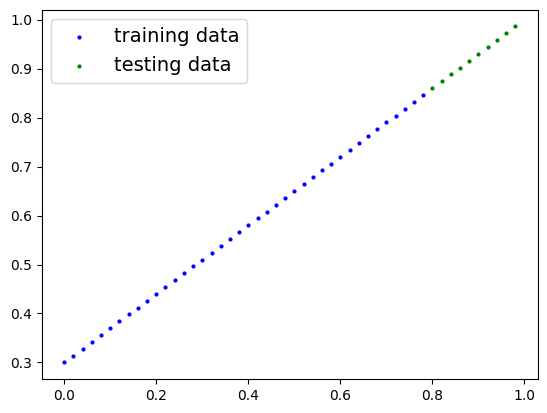

In [7]:
plot_predictions();

## 2. building model

In [8]:
# creating linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float32))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float32))

  #forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # linear regression formula



### pytorch model building essentials

* torch.nn
* torchn.nn.Parameters
...

In [9]:
#cheking out our model

# random seed
torch.manual_seed(42)

# creating a instance of our model

model_0 = LinearRegressionModel()

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


### making predictions using `torch.inference_mode()`

In [11]:
print(X_test)
print(y_test)

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [12]:
with torch.inference_mode():
  y_preds = model_0(X_test)

print(y_preds)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


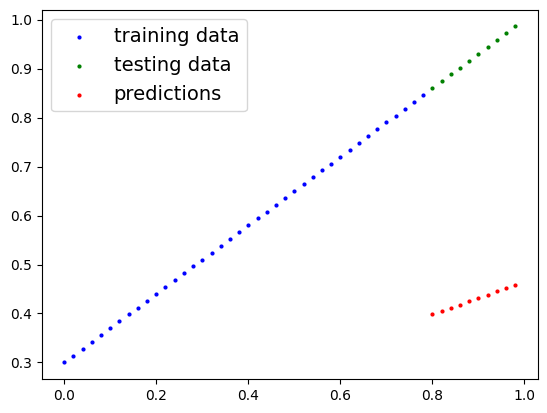

In [13]:
plot_predictions(predictions = y_preds)

## 3. training!

fit the random parameters of the model to the real parameters of the function

and some stuff about loss functions and optimizers

In [17]:
# setting up a loss function
loss_fn = nn.L1Loss()


# setting up an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)


### Build a training and testing loop

0. loop trhough the data
1. forward pass | make predictions
2. getting loss | compare predictions to GT (ground truth)
3. optimizer zero grad
4. loss backward (backpropagation_
5. optimizer step (gradient descent)

In [ ]:
epochs = 1

for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # Train mode sets all parameters to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation with the loss values
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  # model_0.eval() # Turn gradients off